# Session 9, Logistic Regression

## The Logistic Classifier

Regression techniques are typically used for predicting the real-valued output. But what if the output is discrete and even binary - 0 and 1 - i.e. what if we are dealing with a binary classification problem based on the real-valued input variables? 

Consider a training sample of size $N$ for a binary output variable 
$${\displaystyle y = }
\left\{ \begin{array}{l l} 
{1} & \quad \text{event happened }\\ 
{0} & \quad \text{event not happened } \\
\end{array} \right.
$$
and $n$ regressors $x^j$: 
$$
X=\{x_i, i=1..N\}=\{x_i^j, i=1..N, j=1..n\},\ Y=\{y_i, i=1..N\}.
$$ 

As before, instead of trying to predict the spefic value of $y$, we admit its uncertainty considering it a binary random variable, trying to predict its probability distribution (Bernoulli as the only meaningfull one for a binary variable):

$$
P(y|x,\beta)=Bern(y|\mu(x,\beta))
$$

A simplest suggestion for $\mu$ would be a linear model:

$$
\mu(x,\beta)=x\beta,
$$

however as $\mu=P(d=1)$ is the probability, it can only take values between 0 to 1, while there is no good way to ensure that the linear form $x\beta$ takes value within this interval. This could be corrected by considering 
$$
\mu(x,\beta)=f(x\beta),
$$
where $f$ is a certain function taking values only between 0 and 1. As for this function $f$, one can select a sigmoid function
$$
f(x)=\sigma(x)=\frac{e^x}{1+e^x}=\frac{1}{1+e^{-x}}.
$$
Sigmoid function always takes values within the interval $(0,1)$. This way 

$$
{\displaystyle P(y=1) = \sigma(x\beta)=\frac{\exp(x\beta)}{1+\exp(x\beta)}}=\frac{1}{1+\exp(-x\beta)}
$$$$
\displaystyle P(y=0) = 1-P(y=1)=\frac{1}{1+\exp(x\beta)}
$$

Then the likelihood of getting observed values of the output variable $y_i$ corresponding to the inputs $x_i$ can be defined as
$$
L=\prod\limits_i P(y=y_i|x_i,\beta),
$$
while log-likelihood is
$$
log(L)=\sum\limits_i log\left(P(y=y_i|x_i,\beta)\right)=\sum\limits_i y_i log\left(P(y=1|x_i,\beta)\right)+
\sum\limits_i (1-y_i)log\left(P(y=0|x_i,\beta)\right)=
$$$$
-\sum\limits_i log\left(1+exp((2 y_i-1)x_i\beta)\right).
$$
Then
$$
\beta=argmin_{\beta} \sum\limits_i log\left(1+exp((2 y_i-1)x_i\beta)\right).
$$
The above optimization problem can no longer be solved in the closed analytic form, but instead a multivariate iterational numerical optimization heuristics, such as various gradient decent methods, could be applied. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
%pylab inline
#import shapefile

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['image.cmap'] = 'RdYlGn'

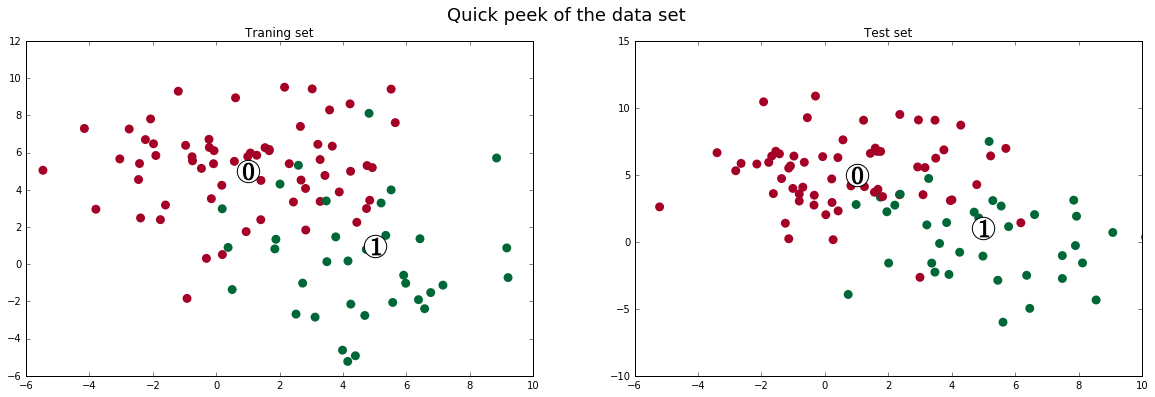

In [5]:
# generate some random 2d data points around two centroid points (1,5) and (5,1)
# classified based on which of the centroids was used, (1,5) label 0 and (5,1) with label 1
n = 100
random.seed(2016)
label = np.random.binomial(1, 0.4, size = 2*n)  # Bernoulli is binomial with n = 1
x = np.array([1,5])[label] + np.random.normal(0, 2.5, size = 2*n)
y = np.array([5,1])[label] + np.random.normal(0, 2.5, size = 2*n)

#visualization
fig1 = plt.figure(figsize = (20,6))
plt.suptitle("Quick peek of the data set", fontsize = 18)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.scatter(x[:n], y[:n], lw = 0, s = 80, c = label[:n])
ax2.scatter(x[n:], y[n:], lw = 0, s = 80, c = label[n:])
ax1.set(title = 'Traning set', xlim = [-6,10])
ax2.set(title = 'Test set', xlim = [-6,10])

ax1.scatter([1,5], [5,1], marker='o', c="w", s=500)
ax2.scatter([1,5], [5,1], marker='o', c="w", s=500)
for i, c in enumerate([1,5]):
    ax1.scatter(c, 6-c, marker='$%d$'%i, s=280, color = 'k')
    ax2.scatter(c, 6-c, marker='$%d$'%i, s=280, color = 'k')

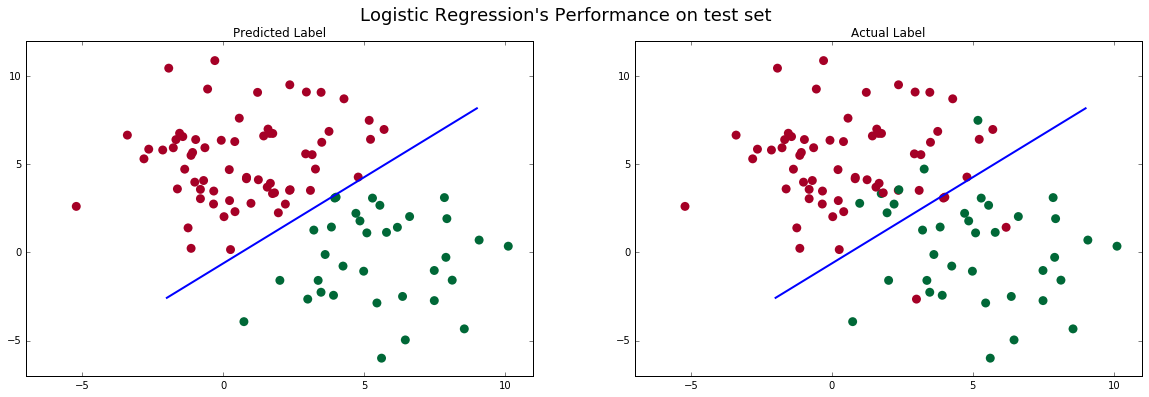

In [6]:
#learn logistic regression over the training sample
logit = LogisticRegression(C=1e6)
logit.fit(np.c_[x[:n], y[:n]],label[:n])
# C here controls the regularization strength--which will be discussed in Bayesian session
# For now just keep in mind that setting a high value will make the regularization ineffective

#apply to the validation sample
labelPred = logit.predict(np.c_[x[n:], y[n:]])
#labelPred = logPred > 0.5
labelActual = label[n:]

fig2 = plt.figure(figsize = (20,6))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 18)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)

#decision boundary
xplot = np.linspace(-2,9,200)
yplot = -(logit.intercept_[0] + logit.coef_[0][0]*xplot)/logit.coef_[0][1]
ax1.plot(xplot,yplot,lw = 2)
ax2.plot(xplot,yplot,lw = 2)

ax1.set(title='Predicted Label', xlim = [-7,11], ylim = [-7,12])
ax2.set(title='Actual Label', xlim = [-7,11], ylim = [-7,12])
ax1.scatter(x[n:], y[n:], lw = 0, s = 80, c = labelPred)
ax2.scatter(x[n:], y[n:], lw = 0, s = 80, c = labelActual)
plt.show()

In [7]:
logitProbability = logit.predict_proba(np.c_[x[n:], y[n:]])
logitProbability

array([[  4.73630861e-01,   5.26369139e-01],
       [  9.90539699e-01,   9.46030131e-03],
       [  9.64122326e-01,   3.58776743e-02],
       [  6.09297687e-03,   9.93907023e-01],
       [  8.41015663e-01,   1.58984337e-01],
       [  7.91003268e-01,   2.08996732e-01],
       [  6.52805744e-01,   3.47194256e-01],
       [  9.97471504e-01,   2.52849575e-03],
       [  9.99582139e-01,   4.17861491e-04],
       [  9.78083385e-01,   2.19166146e-02],
       [  2.82211024e-03,   9.97177890e-01],
       [  2.38283240e-01,   7.61716760e-01],
       [  9.33148260e-01,   6.68517403e-02],
       [  2.91223575e-02,   9.70877642e-01],
       [  9.10937391e-01,   8.90626085e-02],
       [  9.01382544e-01,   9.86174558e-02],
       [  5.86394629e-01,   4.13605371e-01],
       [  8.71883598e-01,   1.28116402e-01],
       [  6.80877091e-03,   9.93191229e-01],
       [  8.82127872e-01,   1.17872128e-01],
       [  9.84655866e-01,   1.53441341e-02],
       [  4.77032415e-03,   9.95229676e-01],
       [  

In [8]:
logitProbability.argmax(1)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
# This is how predicted label was created--maximum likelihood
logitProbability.argmax(1) == labelPred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

## Confusion matrix

Fit of the binary classificator over the selected test set can be characterized by the confusion matrix
$$
\left[\begin{array}{c|c}TP&FN\\
\hline
FP&TN\end{array}\right]
$$
with
* $TP$ - number of true positives (correctly classified positives ($y_i=1$)), 
* $FP$ - number of false positives (observed negatives ($y_i=0$) incorrectly classified as positives ($y_i=1$)), 
* $FN$ - number of false negatives (observed positives ($y_i=1$) incorrectly classified as negatives ($y_i=0$)), 
* $TN$ - number of true negatives (correctly classified negatives ($y_i=0$)).

In relative terms the following quantities are often considered:

* Precision or positive predictive value (fraction of true positive classifications among all actual positive observations):
$$
PPV=\frac{TP}{TP+FP},
$$
* Sensitivity or recall or true positive rate (fraction of true positives among all positive classifications):
$$
TPR=\frac{TP}{TP+FN},
$$
* Accuracy (fraction of true classifications among all instances considered)
$$
ACC=\frac{TP+TN}{TP+TN+FP+FN}.
$$

In [10]:
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 88.24%
Accuracy = 89.00%
Recall = 81.08%


In [11]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(labelPred, labelActual))
print('\nTP = %d, TN = %d, FP = %d, FN = %d'%(TP,TN,FP,FN))

[[59  7]
 [ 4 30]]

TP = 30, TN = 59, FP = 4, FN = 7


### All three are quite high, indicating our model's good performance, thanks to the separability of the data. Next let's see something else:

## Practice
### Interpreting logit coeffients and statistics
Example - learning the probability of school admission based on two exams

In [2]:
admission = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/admission.csv')  
admission.head()

,exam1,exam2,admit
0,34,78,0
1,30,43,0
2,35,72,0
3,60,86,1
4,79,75,1


In [3]:
# split sample into training and test ones
np.random.seed(100)
Index = np.random.binomial(1, 0.6, size = len(admission))
train, test = admission[Index==1], admission[Index==0]

In [44]:
len(train)

66

In [14]:
# Q1. Perform the similar analysis, run the logistic regression on the training set
# Q2. Predict admittance on you test set, compare with the actual labels
# Q3. Calculate the confusion matrix, how well is our model performing?
# Q4. Predict the probability of acceptance for a student with exam scores 75 and 53.

In [49]:
n = len(admission.exam1)
logit = LogisticRegression(C=1e6)
logit.fit(np.c_[train.exam1[:n], train.exam2[:n]],admission.admit[:n])

ValueError: Found input variables with inconsistent numbers of samples: [66, 100]

In [47]:
labelPred = logit.predict(np.c_[train.exam1[n:], train.exam2[n:]])
labelActual = train.admit[:n]

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

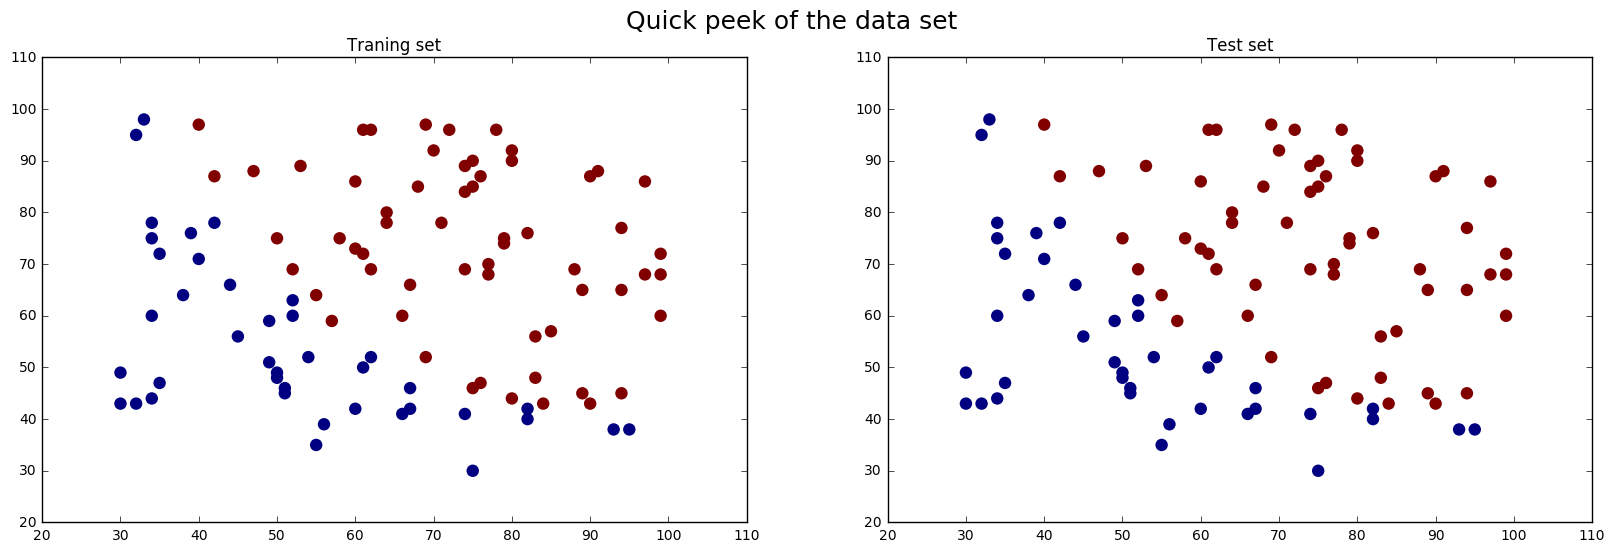

In [12]:
fig1 = plt.figure(figsize = (20,6))
plt.suptitle("Quick peek of the data set", fontsize = 18)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.scatter(admission.exam1[:n], admission.exam2[:n], lw = 0, s = 80, c = admission.admit[:n])
ax2.scatter(admission.exam1[:n], admission.exam2[:n], lw = 0, s = 80, c = admission.admit[:n])
ax1.set(title = 'Traning set')
ax2.set(title = 'Test set')

#ax1.scatter([1,5], [5,1], marker='o', c="w", s=500)
#ax2.scatter([1,5], [5,1], marker='o', c="w", s=500)

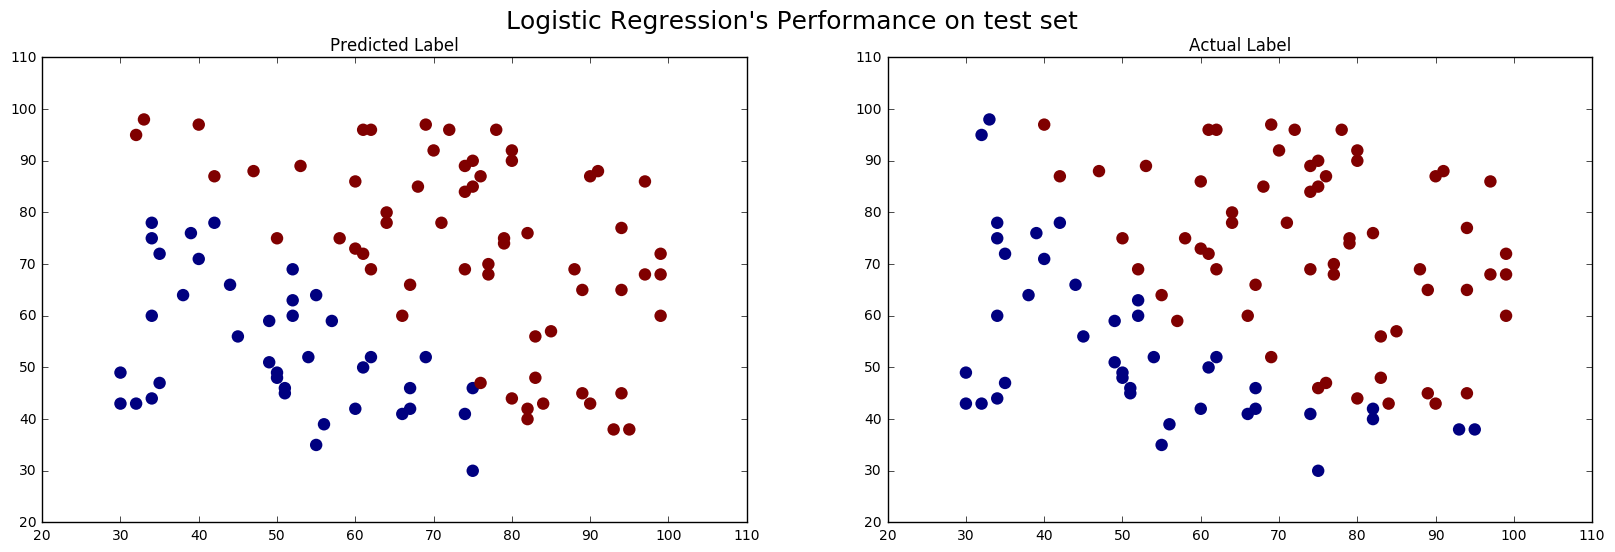

In [29]:
fig2 = plt.figure(figsize = (20,6))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 18)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)


ax1.set(title='Predicted Label')
ax2.set(title='Actual Label')
ax1.scatter(admission.exam1[:n], admission.exam2[:n], lw = 0, s = 80, c = labelPred)
ax2.scatter(admission.exam1[:n], admission.exam2[:n], lw = 0, s = 80, c = admission.admit[:n])
plt.show()

In [30]:
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 90.16%
Accuracy = 89.00%
Recall = 91.67%


In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(labelPred, labelActual))
print('\nTP = %d, TN = %d, FP = %d, FN = %d'%(TP,TN,FP,FN))

[[34  5]
 [ 6 55]]

TP = 55, TN = 34, FP = 6, FN = 5


In [38]:
logitProbability = logit.predict_proba(np.c_[admission.exam1[:n], admission.exam2[:n]])
logitProbability

array([[  9.04679976e-01,   9.53200238e-02],
       [  9.99960089e-01,   3.99106505e-05],
       [  9.62750177e-01,   3.72498226e-02],
       [  8.65473496e-03,   9.91345265e-01],
       [  1.56816646e-03,   9.98431834e-01],
       [  9.87946617e-01,   1.20533832e-02],
       [  9.45931836e-04,   9.99054068e-01],
       [  5.53171004e-01,   4.46828996e-01],
       [  2.60413592e-04,   9.99739586e-01],
       [  2.60312225e-01,   7.39687775e-01],
       [  9.00438268e-02,   9.09956173e-01],
       [  9.68833048e-01,   3.11669523e-02],
       [  6.89769300e-04,   9.99310231e-01],
       [  1.47854893e-04,   9.99852145e-01],
       [  8.34614879e-01,   1.65385121e-01],
       [  1.98999012e-02,   9.80100099e-01],
       [  5.61250561e-01,   4.38749439e-01],
       [  8.66316614e-01,   1.33683386e-01],
       [  3.29113534e-04,   9.99670886e-01],
       [  4.51435570e-01,   5.48564430e-01],
       [  9.35510318e-01,   6.44896825e-02],
       [  1.48499417e-03,   9.98515006e-01],
       [  

In [39]:
logitProbability.argmax(1) == labelPred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

## Extended reading: multiclass classification. Iris dataset with sklearn

In [50]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

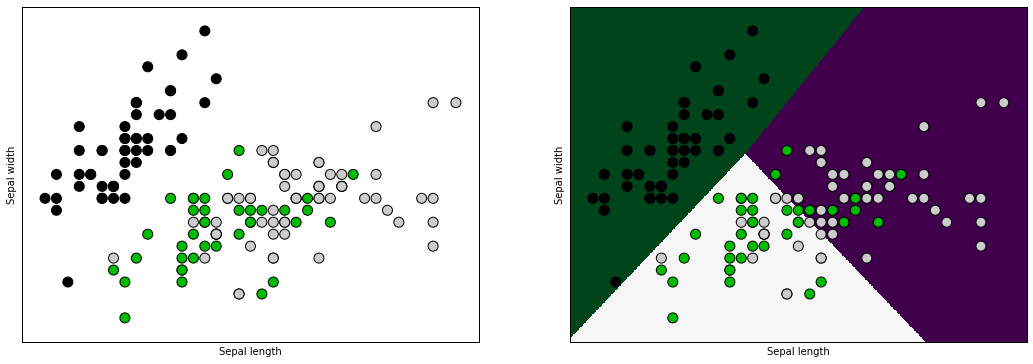

In [18]:
logreg = LogisticRegression(C = 1e6)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] times [y_min, y_max].
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 600), np.linspace(y_min, y_max, 600))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig4 = plt.figure(3, figsize=(18, 6))
ax1, ax2 = fig4.add_subplot(121), fig4.add_subplot(122)

# Plot the dots with labels only
ax1.scatter(X[:, 0], X[:, 1], c=Y, s = 100, edgecolors='k', cmap=plt.cm.spectral)
ax1.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())))

# Plot the decision boundaries and the partition areas
ax2.pcolormesh(xx, yy, Z, cmap = plt.cm.PRGn_r)
ax2.scatter(X[:, 0], X[:, 1], c=Y, s = 100, edgecolors='k', cmap=plt.cm.spectral)
ax2.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())))
plt.show()